## Density real data 

In [1]:
from os.path import join
datapath = '../paper2NoteBooksData'
real_path = join(datapath,"RealTreesNoFloor")

In [2]:
import os 
import glob 
import numpy as np


In [3]:

def load_datas(path):
    files = glob.glob( os.path.join( path, "*.txt" ) )
    print("Found %i files" %(len(files)))
    datas = {}
    for  idx1, afile in enumerate(files):
        print("Load file [%i/%i]" %(idx1+1, len(files)), end="\r" if (idx1<len(files)) else "\n" )
        datas[afile] = np.loadtxt(afile)[:,0:3]
    return datas
    


In [4]:
real_datas = load_datas(real_path)

Found 9 files


In [5]:
from pointCloudsDescriptor import PointCloudFEvaluator


In [6]:

def compute_densities(datas, radius=0.1):
    pcEval = PointCloudFEvaluator()
    densities = {}
    for  idx1, (afile,a_pc) in enumerate(datas.items()):
        print("Density file [%i/%i]" %(idx1+1, len(datas)), end="\r" if (idx1<len(datas)) else "\n" )
        densities[afile] = pcEval.get_point_cloud_density(a_pc, radius)
    return densities



In [7]:
real_densities = compute_densities(real_datas)


In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 


def plot_histograms(densities, nbbins = 20):
    axs  = plt.figure(figsize=(15,20)).subplots(nrows=5, ncols=2, sharey=True)
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    def plot_histo(idensities, c = None):
        hist, bins = np.histogram(idensities, bins=nbbins)
        hist = hist/len(idensities)
        bins = bins / 10**6
        width = np.diff(bins)
        center = (bins[:-1] + bins[1:]) / 2 
        ax.bar(center, hist, align='center', width=width,color=c)
        plt.plot(bins[:-1]+width/2, hist,'r')
        
    # Plots Real scan Apple Non Apple 
    nbrows = int(len(densities)//2)+1
    for idx, (name, idensities) in enumerate(densities.items(), start=1):
        ax = plt.subplot(nbrows, 2, idx)
        plot_histo(idensities)

    total = np.concatenate(list(densities.values()))
    ax = plt.subplot(nbrows, 2, len(densities)+1)
    plot_histo(total,'g')
    


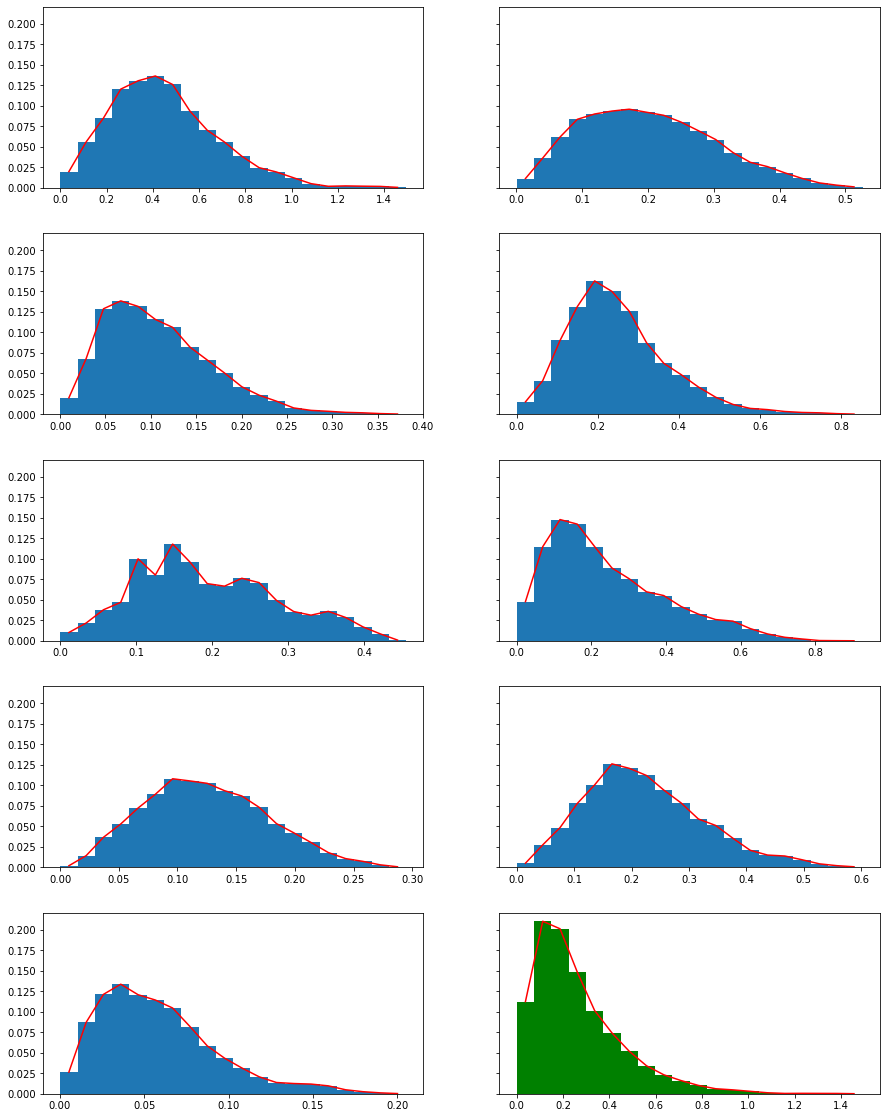

In [9]:
plot_histograms(real_densities)

In [10]:
syn_path_j01rw0 = join(datapath,"synthetic_jitter01rw0")
syn_datas_j01rw0 = load_datas(syn_path_j01rw0)

Found 8 files


In [11]:
syn_densities_j01rw0 = compute_densities(syn_datas_j01rw0)

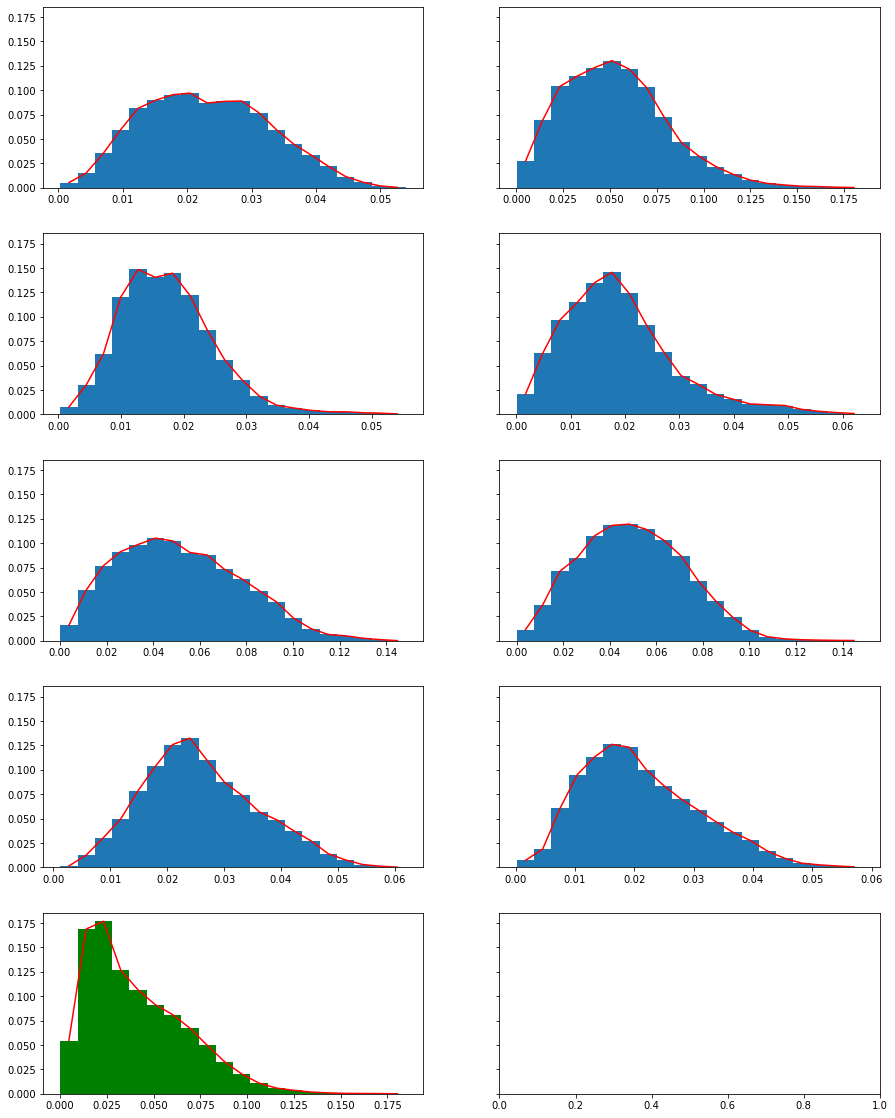

In [12]:
plot_histograms(syn_densities_j01rw0)

In [13]:
syn_path_j04rw0 = join(datapath,"synthetic_jitter04rw0")
syn_datas_j04rw0 = load_datas(syn_path_j04rw0)

Found 8 files


In [14]:
syn_densities_j04rw0 = compute_densities(syn_datas_j04rw0)

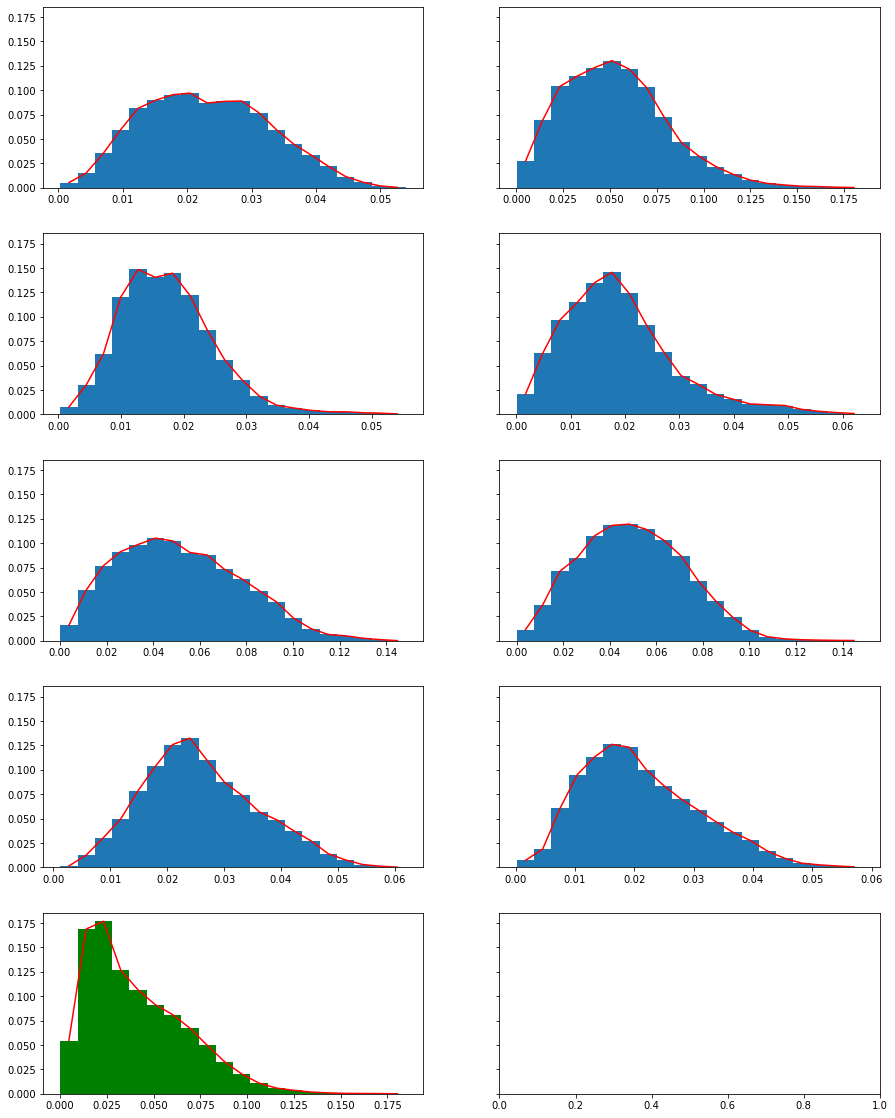

In [15]:
plot_histograms(syn_densities_j01rw0)

In [16]:
syn_densities_j08rw0 = compute_densities(load_datas(join(datapath,"synthetic_jitter08rw0")))

Found 8 files


In [27]:
def plot_comparison(datas, nbbins = 80):
    #_, globalbins = np.histogram(np.concatenate(list(datas.values())), bins=nbbins)
    plt.figure(figsize=(15,5))
    for name, idensities in datas.items():
        hist, bins = np.histogram(idensities, bins=nbbins) #globalbins)
        hist = hist/len(idensities)
        bins = bins / 10**6
        width = np.diff(bins)
        center = (bins[:-1] + bins[1:]) / 2 
        plt.bar(center, hist, align='center', width=width, alpha=0.5)
        plt.plot(bins[:-1]+width/2, hist, label = name)
    plt.legend()

In [28]:
datas= { 'Real' : np.concatenate(list(real_densities.values())),
         'Synthetic Jitter 04' : np.concatenate(list(syn_densities_j04rw0.values())),
         'Synthetic Jitter 08' : np.concatenate(list(syn_densities_j08rw0.values())),
         'Synthetic' : np.concatenate(list(syn_densities_j01rw0.values())),
       }

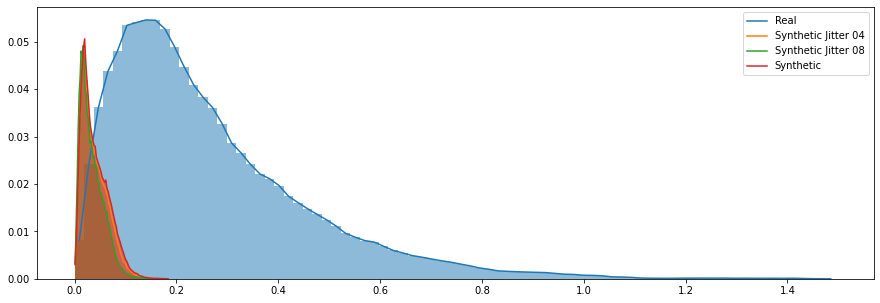

In [29]:
plot_comparison(datas)

In [30]:
datas= { 'Real' : list(real_densities.values())[1],
         'Synthetic Jitter 04' : list(syn_densities_j04rw0.values())[1],
         'Synthetic Jitter 08' : list(syn_densities_j08rw0.values())[1],
         'Synthetic' : list(syn_densities_j01rw0.values())[1],
       }

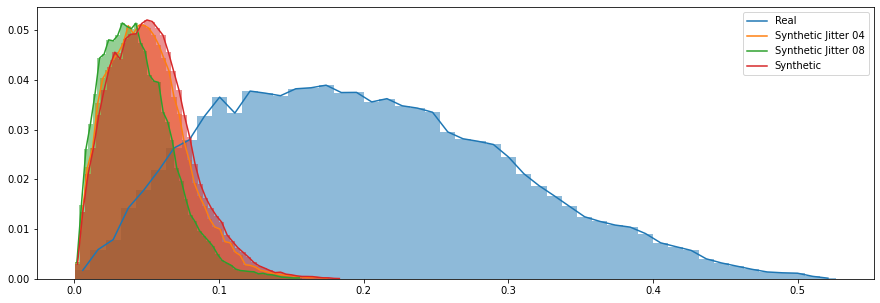

In [31]:
plot_comparison(datas, 50)

In [32]:
def plot_comparison2(datas, nbbins = 80):
    #_, globalbins = np.histogram(np.concatenate(list(datas.values())), bins=nbbins)
    for name, idensities in datas.items():
        _, globalbins = np.histogram(np.concatenate(idensities), bins=nbbins)
        hists = []
        for idensity in idensities:
            hist, bins = np.histogram(idensity, bins=globalbins)
            hist = hist/len(idensity)
            hists.append(hist)
            width = np.diff(bins)
            center = (bins[:-1] + bins[1:]) / 2 
        globalbins = globalbins / 10**6
        plt.plot(bins[:-1]+width/2, np.mean(hists, axis=0),label = name)
        plt.fill_between(bins[:-1]+width/2, np.min(hists, axis=0), np.max(hists, axis=0), alpha=0.5)
    plt.legend()

In [33]:
datas= { 'Real' : list(real_densities.values()),
         'Synthetic Jitter 04' : list(syn_densities_j04rw0.values()),
         'Synthetic Jitter 08' : list(syn_densities_j08rw0.values()),
         'Synthetic' : list(syn_densities_j01rw0.values()),
       }

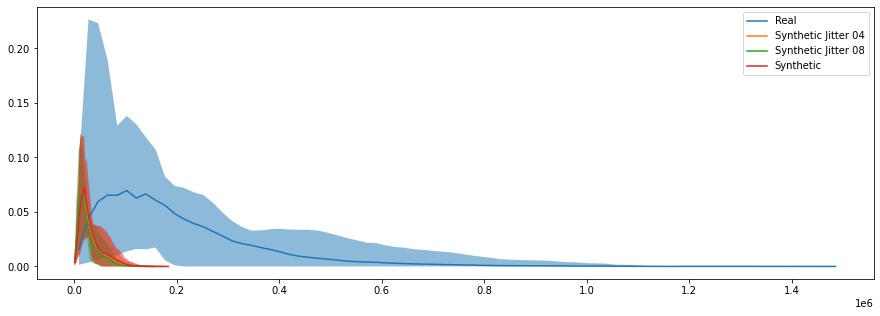

In [34]:
plt.figure(figsize=(15,5))
plot_comparison2(datas, 80)